# Neon Facebook Video Ad Analysis

The goal of this analysis is to determine how useful the NeonScore is for predicting ad recall and view rate for ads on Facebook. NeonScore is our proprietary scale that measures the predicted unconscious emotional impact of an image. The higher the score, the greater the predicted impact/engagement.

Note that we are not training on the data provided. We are simply examining if our existing metric is related to the measures advertisers care about.

Overall, the NeonScore is correlated with both ad recall rate and view rate. Below, you’ll find examples where the NeonScore reliably predicted ad recall and view rate outcomes, and examples where the NeonScore was less predictive of ad recall and view rate outcomes.

We’re currently doing further analysis to better understand why the NeonScore was more predictive or less predictive for certain types of content, and why the NeonScore is correlated to both ad recall and view rates given that those two metrics do not appear to be otherwise correlated.

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os.path
import os
import pandas as pd
from PIL import Image
import random
import re
import scipy.stats

In [2]:
all_data = pd.read_pickle('/data/neon/facebook/video_ads/neon_scores.pkl')

# Quick Correlations

Let's start by quickly looking at the correlations in the dataset

In [3]:
def print_correlations(data):
    data = data.dropna()
    print '%s vs %s' % (data.columns[0], data.columns[1])
    print 'Spearman: %f P-value: %f' % scipy.stats.spearmanr(data.iloc[:,0], data.iloc[:,1])
    print 'Pearson: %f P-value: %f' % scipy.stats.pearsonr(data.iloc[:,0], data.iloc[:,1])

In [4]:
print_correlations(all_data[['Whole Video Neon Score', 'View Rate']])

Whole Video Neon Score vs View Rate
Spearman: 0.093253 P-value: 0.037304
Pearson: 0.116737 P-value: 0.009052


In [5]:
print_correlations(all_data[['3s Neon Score', 'View Rate']])

3s Neon Score vs View Rate
Spearman: 0.159951 P-value: 0.000334
Pearson: 0.171554 P-value: 0.000118


In [6]:
print_correlations(all_data[['Whole Video Neon Score', 'Ad Recall']])

Whole Video Neon Score vs Ad Recall
Spearman: -0.218540 P-value: 0.000007
Pearson: -0.155714 P-value: 0.001482


In [7]:
print_correlations(all_data[['3s Neon Score', 'Ad Recall']])

3s Neon Score vs Ad Recall
Spearman: -0.065134 P-value: 0.185942
Pearson: -0.010289 P-value: 0.834664


In [17]:
print_correlations(all_data[['Ad Recall', 'View Rate']])

Ad Recall vs View Rate
Spearman: 0.037629 P-value: 0.462780
Pearson: 0.032870 P-value: 0.521290


# Indicative Video Examples

In this section, we display a frame from each video for the examples that are most extremal in order to get some insight into the success cases and failure cases. 

We are going to show the following pairs because they are most apprpriate:
1. Whole Video Neon Score <-> Ad Recall
1. First 3s Neon Score <-> View Rate

In all cases, the frame shown is just the middle frame of the video (in the whole video case) or the frame at 1.5 seconds (in the first 3 seconds case). We did not run the videos through our full thumbnail extraction process for this purpose since that is overkill (and a confound) to get an insight into what is going on.

In [8]:
def get_frame(video_fn, frameno=None):
    '''Returns the approximate middle frame of the video'''
    mov = cv2.VideoCapture(video_fn)
    num_frames = int(mov.get(cv2.CAP_PROP_FRAME_COUNT))
    if frameno is None:
        frameno = int(num_frames/2)
    
    mov.set(cv2.CAP_PROP_POS_FRAMES, frameno)
    success, image = mov.read()
    if not success:
        return np.zeros(10, 10, 3)
    return image[:,:,::-1]
    
    
def show_images(scores, base_dir='/data/neon/facebook/video_ads/vids', frameno=None):
    '''Show top images from descending scores. The index will get me to the filename'''
    scores = scores.sort_values(ascending=False)
    
    fig = plt.figure(2, (20,16))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 5))
    i = 0
    for row in scores.index.tolist():
        basename = '%s.mp4' % re.search('[0-9]+', row).group()
        im = Image.fromarray(get_frame(os.path.join(base_dir, basename), frameno=frameno))
        im.thumbnail((200, 200))
        grid[i].imshow(im)
        grid[i].set_xlim(0., 200.)
        grid[i].set_ylim(200., 0.)
        grid[i].axes.get_xaxis().set_ticks([])
        grid[i].axes.get_yaxis().set_ticks([])
        i += 1
        if i >= 20:
            break
    plt.show()

## Low Ad Recall, High Neon Score

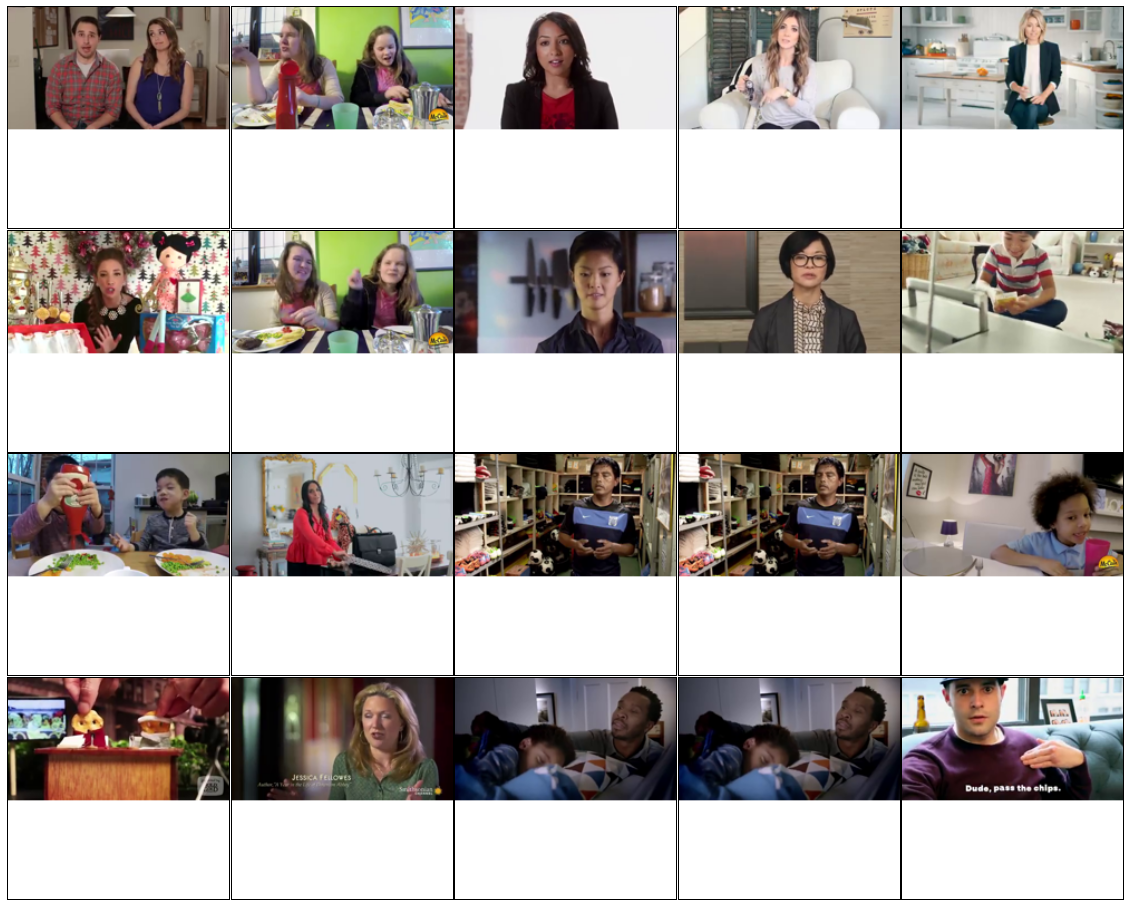

In [9]:
show_images(all_data[all_data['Ad Recall'] == 1]['Whole Video Neon Score'])

## Low Ad Recall, Low Neon Score

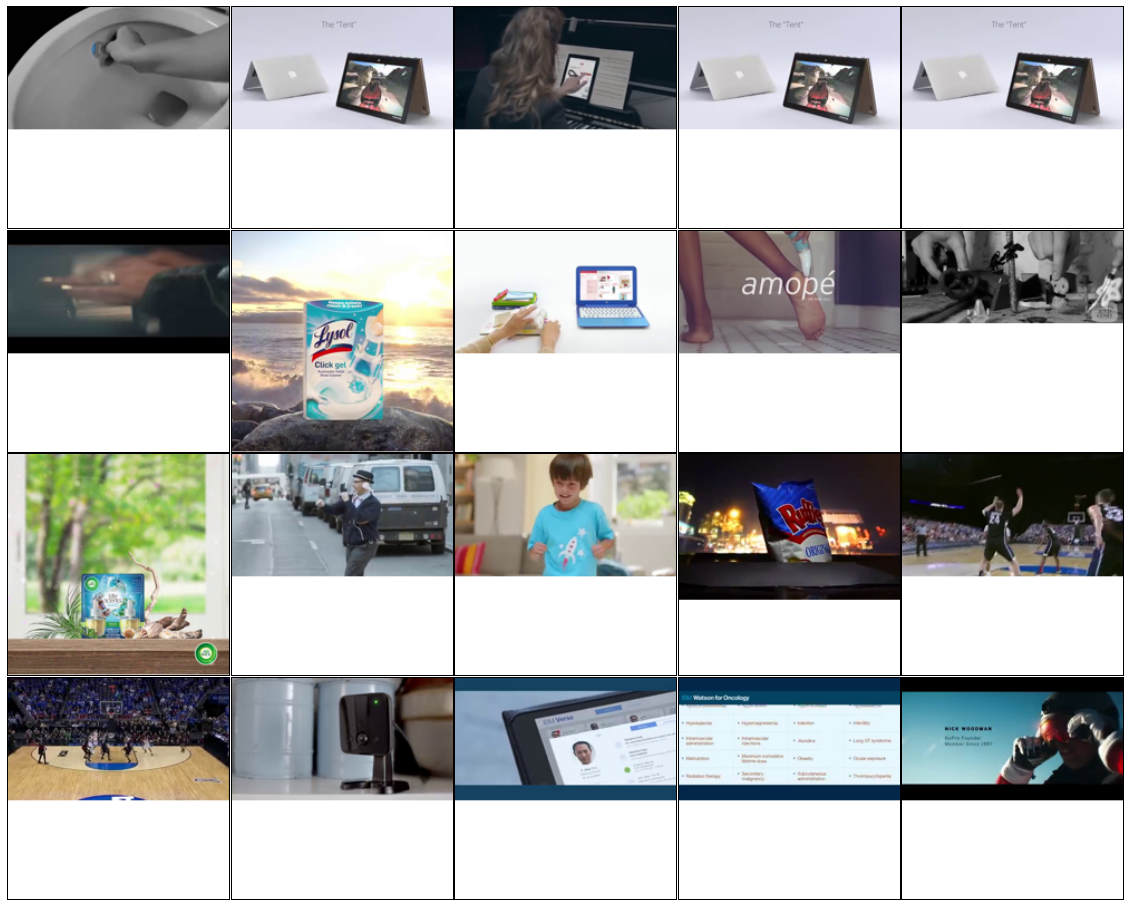

In [10]:
show_images(-all_data[all_data['Ad Recall'] == 1]['Whole Video Neon Score'])

## High Ad Recall, High Neon Score

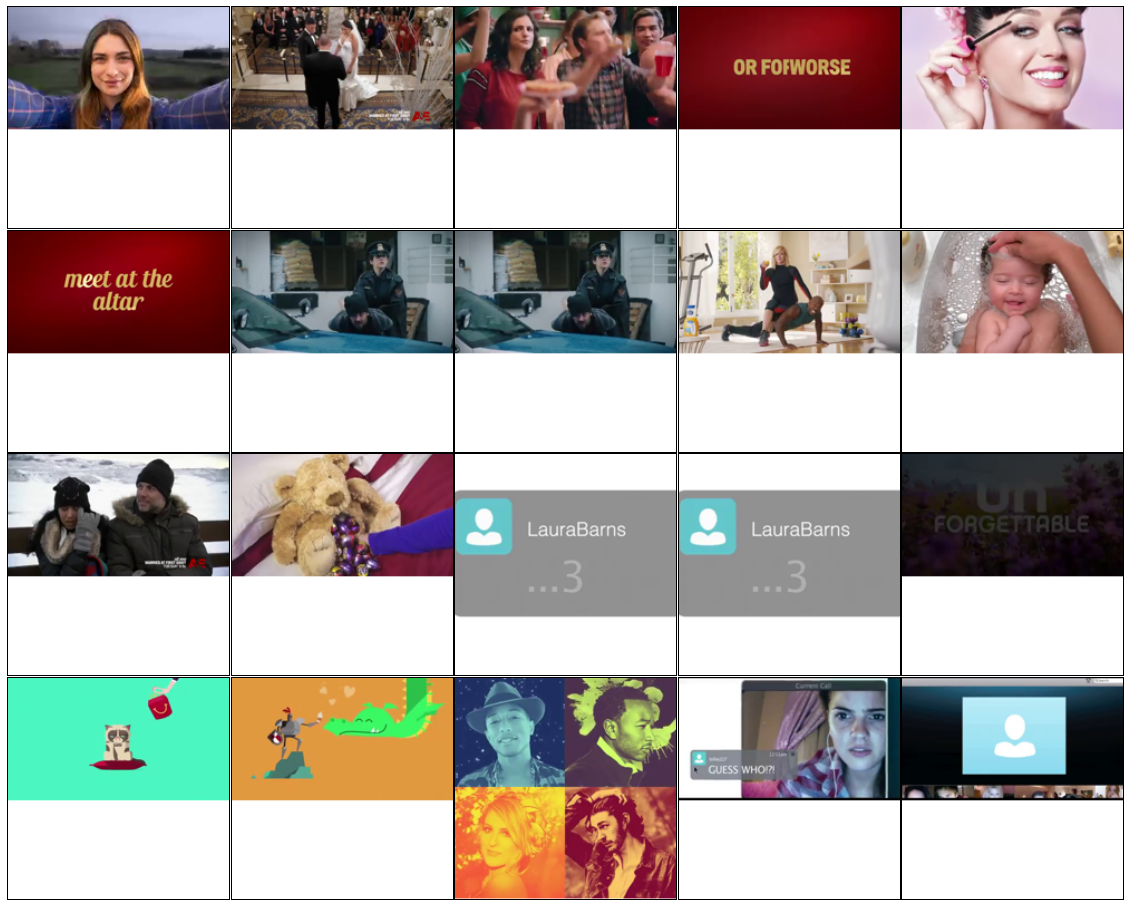

In [11]:
show_images(all_data[all_data['Ad Recall'] == 5]['Whole Video Neon Score'])

## High Ad Recall, Low Neon Score

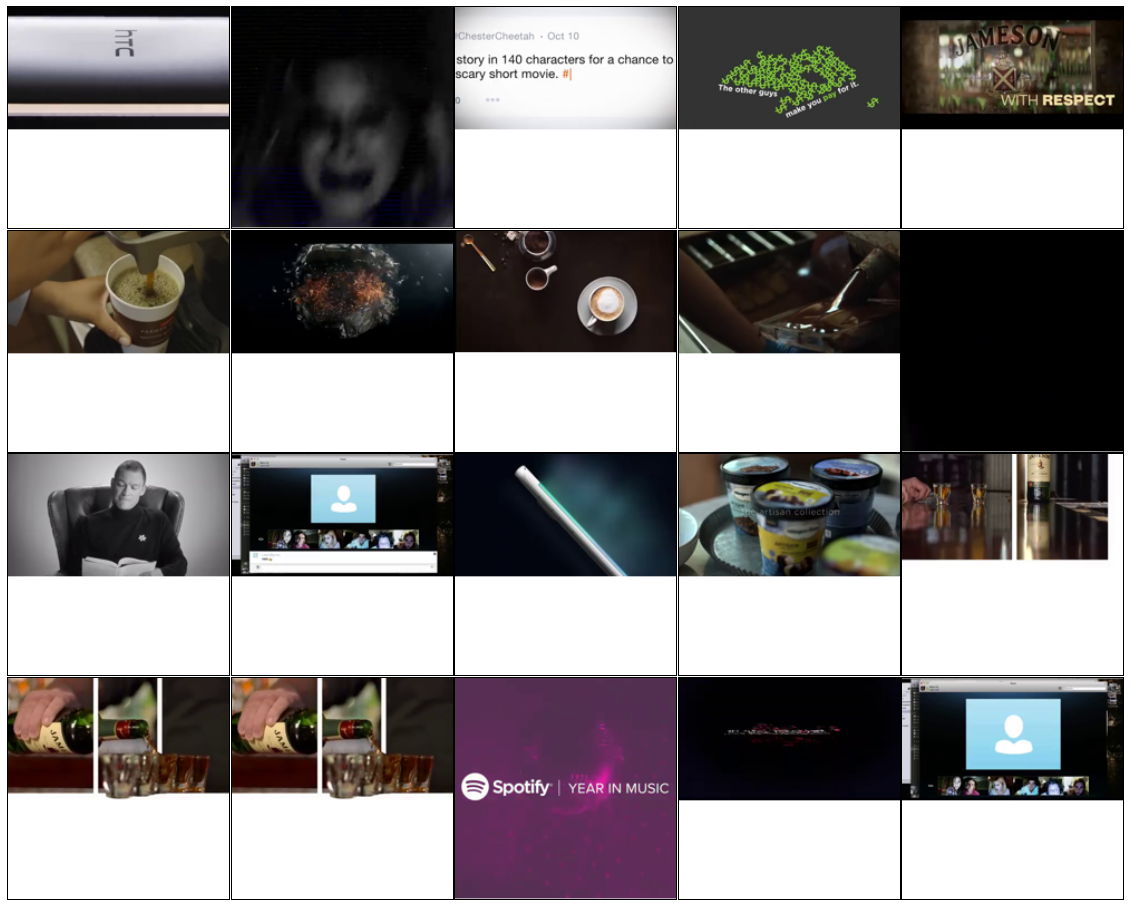

In [12]:
show_images(-all_data[all_data['Ad Recall'] == 5]['Whole Video Neon Score'])

## Low View Rate, High Neon Score

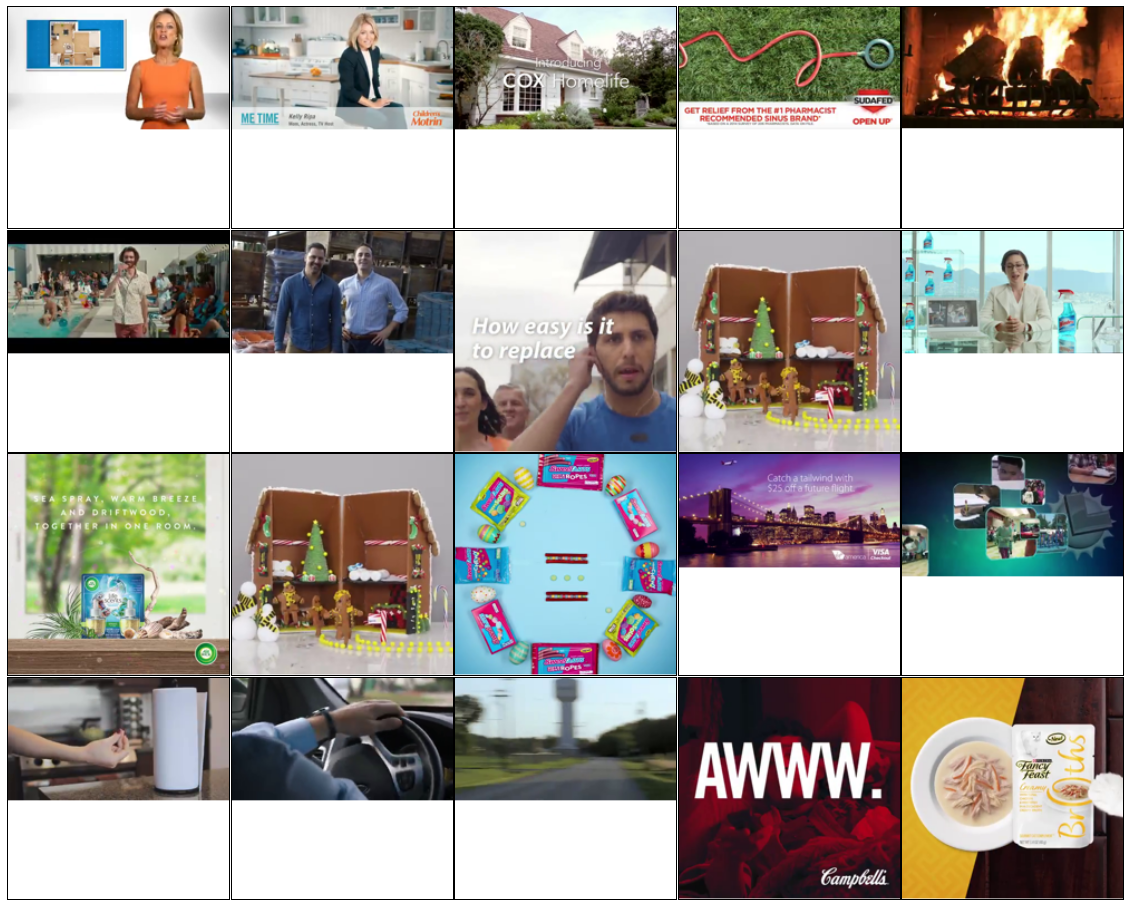

In [13]:
show_images(all_data[all_data['View Rate'] == 1]['3s Neon Score'], frameno=45)

## Low View Rate, Low Neon Score

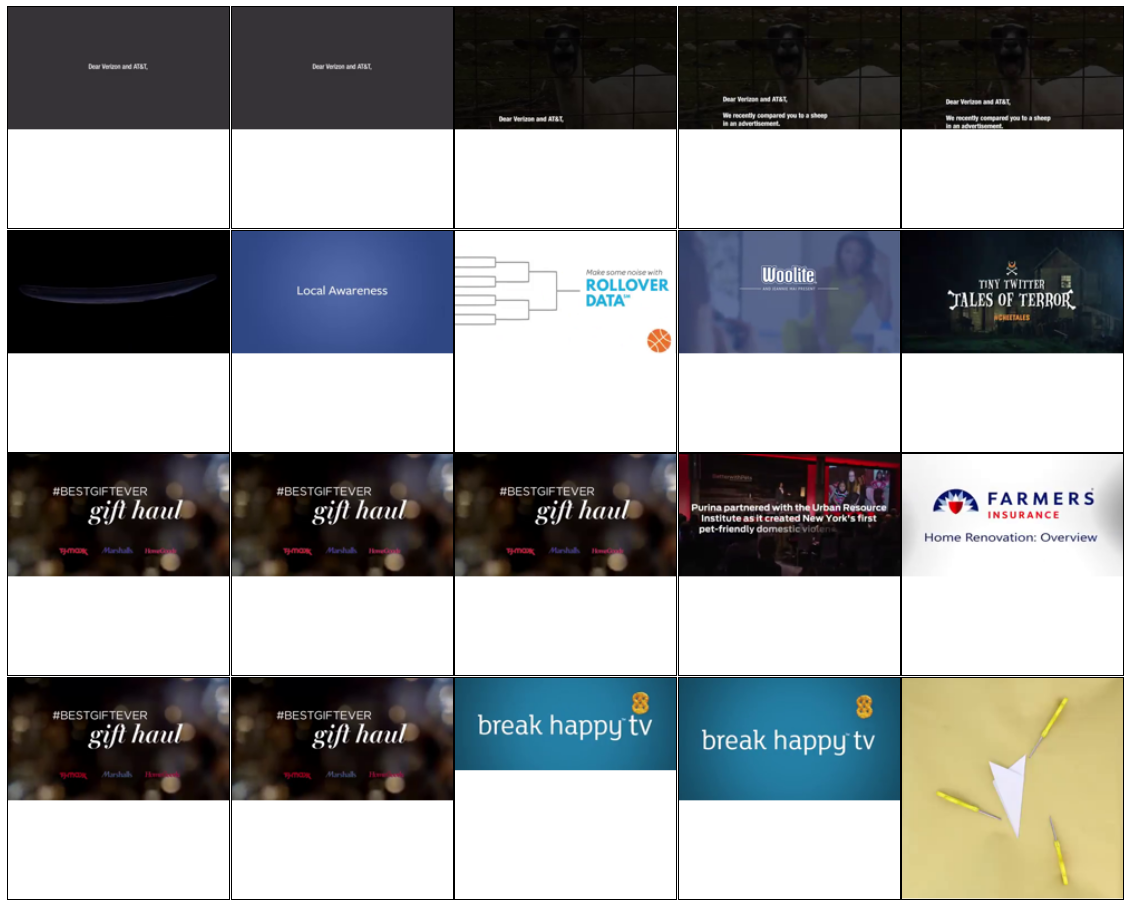

In [14]:
show_images(-all_data[all_data['View Rate'] == 1]['3s Neon Score'], frameno=45)

## High View Rate, High Neon Score

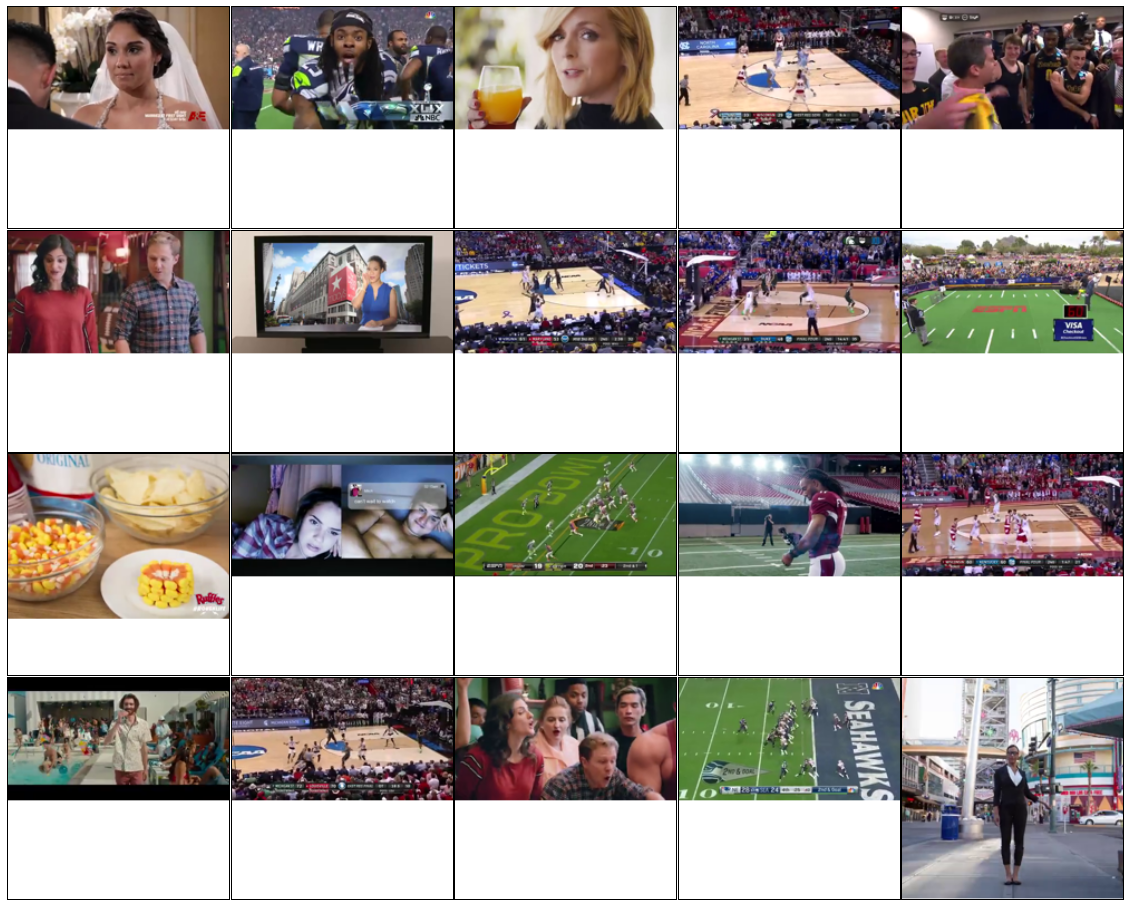

In [15]:
show_images(all_data[all_data['View Rate'] == 5]['3s Neon Score'], frameno=45)

## High View Rate, Low Neon Score

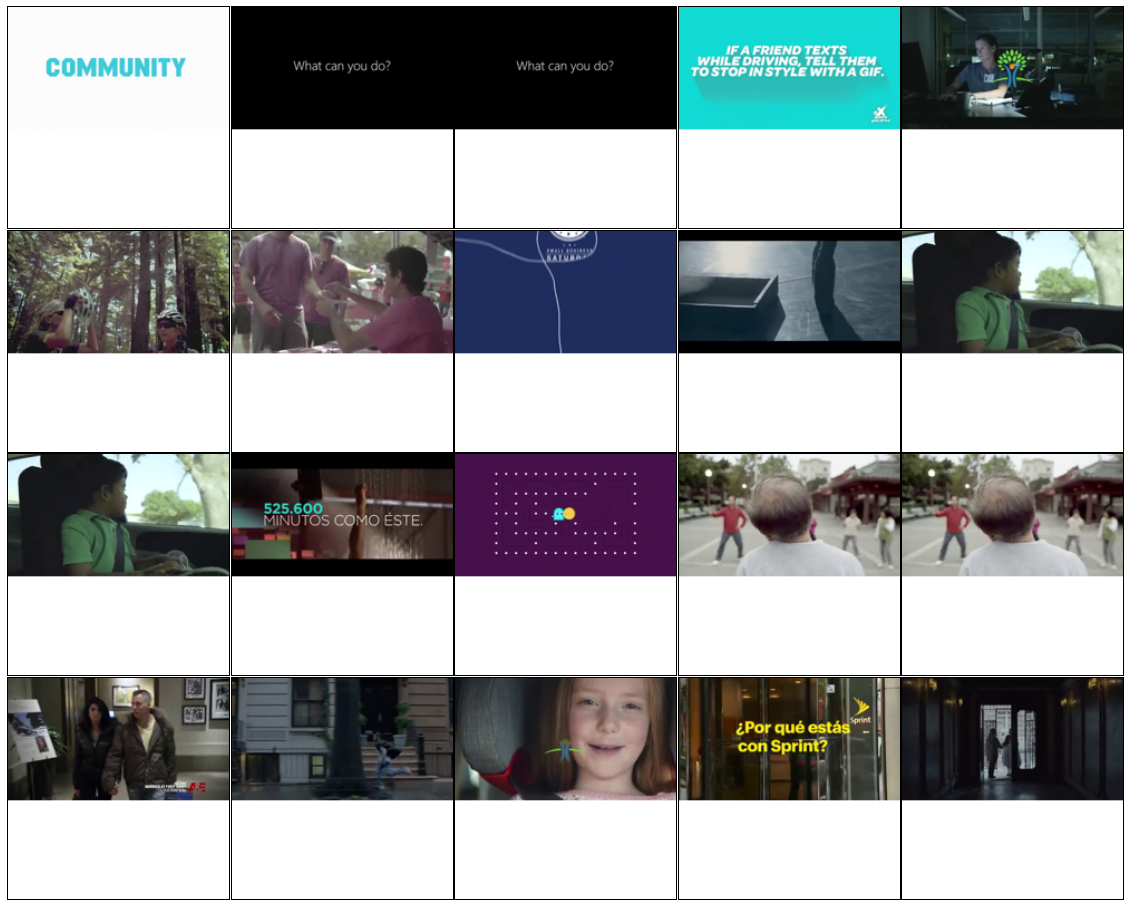

In [16]:
show_images(-all_data[all_data['View Rate'] == 5]['3s Neon Score'], frameno=45)

In [19]:
all_data[all_data['Ad Recall'] == 5]['Whole Video Neon Score'].sort_values()

ID
a808677122533899     -0.835138
a826649627429672     -0.805915
a10153734380077588   -0.804908
a816341441767467     -0.791922
a10152818200833731   -0.734542
a10153338833895101   -0.717062
a10153087099151023   -0.663505
a10152435629435811   -0.557629
a10152725075605811   -0.555587
a10152644084431786   -0.553613
a10153195615044276   -0.553483
a816324418462193     -0.549919
a10152657778241786   -0.538594
a10152725072300811   -0.468483
a10152830699298731   -0.456762
a10152830338073731   -0.444381
a10152830332048731   -0.444381
a872653332747647     -0.444311
a824484220979546     -0.412832
a816322175129084     -0.403305
a10152863676988731   -0.366334
a10153108143821023   -0.354771
a10152755555918519   -0.347944
a880994928580154     -0.337080
a796018780480536     -0.316099
a383830165134133     -0.316076
a10153658233568782   -0.291607
a906048579457880     -0.289764
a906048636124541     -0.289764
a906048336124571     -0.289764
                        ...   
a10153717992047588   -0.126460
a1015

In [20]:
all_data[all_data['View Rate'] == 5]['3s Neon Score'].sort_values()

ID
a10153083302853184   -1.846859
a10152718037338721   -1.454784
a10152717019418721   -1.454784
a10152822986688909   -1.344229
a936621166362825     -1.278778
a766744660030454     -1.276624
a778547615516825     -1.261767
a905427746141816     -1.214812
a1038046456221370    -1.210089
a809665402405046     -1.191386
a10153271678571729   -1.191386
a10153581235945260   -1.177964
a10152465636257014   -1.098364
a10153283048981729   -1.086559
a811392195565700     -1.086559
a361930670676592     -1.081403
a839553949416191     -1.069319
a936620149696260     -1.032087
a556919007741786     -1.028487
a839998586038394     -0.981656
a349008658635460     -0.944282
a724306077647980     -0.935323
a801235209914732     -0.883793
a10153231498031729   -0.883793
a10152833504901263   -0.858679
a10152833584836263   -0.805068
a10153229465746729   -0.740227
a10153573875259056   -0.723710
a10153573844369056   -0.723710
a10153573874414056   -0.723710
                        ...   
a10153233728243760   -0.316947
a1015